<a href="https://colab.research.google.com/github/kordusmonika/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Augmentation

In [80]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [81]:
cd /content/drive/My Drive/Colab Notebooks/dataworkshop_matrix/dw_matrix_road_sign/dw_matrix_road_sign/data 


/content/drive/My Drive/Colab Notebooks/dataworkshop_matrix/dw_matrix_road_sign/dw_matrix_road_sign/data


In [0]:
train = pd.read_pickle('train.p')
test = pd.read_pickle('test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
#y_train should have only one dimension, be careful not to overwrite this!

if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
#Basic Model

In [0]:
input_shape = X_train.shape[1:]  #(32, 32, 3)
num_classes = y_train.shape[1]

In [86]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),

])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten_13 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),

])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train) ),
      callbacks= [tensorboard_callback] #visualisation
    
  )
  
  return model

In [88]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train )

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 37.5750 - accuracy: 0.7388 - val_loss: 0.1971 - val_accuracy: 0.9530
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2150 - accuracy: 0.9522 - val_loss: 0.1229 - val_accuracy: 0.9754
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1405 - accuracy: 0.9683 - val_loss: 0.1589 - val_accuracy: 0.9683
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1361 - accuracy: 0.9693 - val_loss: 0.0750 - val_accuracy: 0.9814
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0964 - accuracy: 0.9775 - val_loss: 0.1041 - val_accuracy: 0.9783


In [89]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob[400]

array([1.9642800e-02, 2.9004533e-03, 9.3141621e-01, 1.3976297e-07,
       4.5985639e-02, 5.6622710e-08, 1.2428255e-12, 4.2619015e-09,
       4.8562165e-10, 5.3057884e-05, 2.5570582e-08, 7.8337323e-11,
       2.0948694e-13, 7.3083970e-09, 3.3965605e-10, 5.3236878e-08,
       1.5177675e-06, 8.0007930e-21, 6.8427535e-16, 5.7886478e-27,
       2.2098612e-16, 6.9334842e-12, 5.2107349e-25, 2.3134764e-17,
       1.7951185e-23, 2.0468832e-14, 9.5054114e-15, 3.3932310e-22,
       9.9086016e-15, 6.3328677e-21, 3.6432785e-16, 3.3808798e-14,
       4.4579672e-16, 9.5746603e-16, 4.2394379e-23, 9.3473753e-15,
       5.6055846e-20, 3.8521268e-29, 9.3355544e-28, 3.8084797e-23,
       1.4579523e-30, 3.2411995e-18, 4.6388537e-19], dtype=float32)

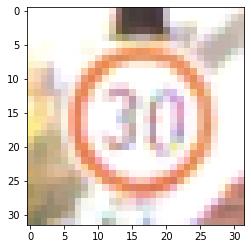

In [90]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('signnames.csv')
labels_dict = df.to_dict()['b']

In [92]:
#Argmax returns index with the highest value
labels_dict[ np.argmax( y_pred_prob[400] ) ]

'Speed limit (50km/h)'

<BarContainer object of 43 artists>

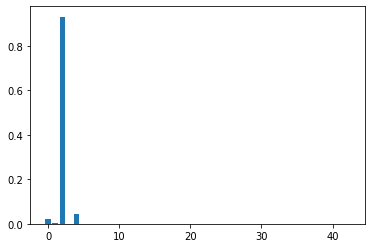

In [93]:
# Cat - visualization for index 400

plt.bar(range(43), y_pred_prob[400])

In [94]:
labels_dict[ 2 ] 

'Speed limit (50km/h)'

In [0]:
#Axis 1 means we want to iterative throughout the whole matrix
#Axis 0 would give us only one value


def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis = 1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax( y_pred_prob, axis=1 )

  return scoring(y_test_norm, y_pred)

In [96]:
predict(model_trained, X_test, y_test)

0.819047619047619

#Basic Model ~82%

#Architecture Engineering

In [0]:
def train_and_predict (model):
  model_trained = train_model(model, X_train, y_train )
  return predict(model_trained, X_test, y_test)

In [98]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax'),

])

train_and_predict (get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 14.0436 - accuracy: 0.6911 - val_loss: 0.1945 - val_accuracy: 0.9547
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.3662 - accuracy: 0.9082 - val_loss: 0.1227 - val_accuracy: 0.9757
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2573 - accuracy: 0.9362 - val_loss: 0.0641 - val_accuracy: 0.9864
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1930 - accuracy: 0.9511 - val_loss: 0.0628 - val_accuracy: 0.9888
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1949 - accuracy: 0.9516 - val_loss: 0.0593 - val_accuracy: 0.9863


0.8149659863945579

In [53]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(64, kernel_size=(3,3), activation='relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax'),

])

train_and_predict (get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.0354 - accuracy: 0.5378 - val_loss: 0.2573 - val_accuracy: 0.9454
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.4255 - accuracy: 0.8795 - val_loss: 0.0816 - val_accuracy: 0.9805
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2243 - accuracy: 0.9355 - val_loss: 0.0500 - val_accuracy: 0.9873
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1653 - accuracy: 0.9530 - val_loss: 0.0293 - val_accuracy: 0.9942
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1151 - accuracy: 0.9659 - val_loss: 0.0196 - val_accuracy: 0.9950


0.9687074829931973

In [54]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax'),

])

train_and_predict (get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.7448 - accuracy: 0.2715 - val_loss: 1.1134 - val_accuracy: 0.6618
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.8686 - accuracy: 0.7286 - val_loss: 0.2474 - val_accuracy: 0.9319
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.3763 - accuracy: 0.8878 - val_loss: 0.0817 - val_accuracy: 0.9773
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2272 - accuracy: 0.9318 - val_loss: 0.0551 - val_accuracy: 0.9848
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1787 - accuracy: 0.9485 - val_loss: 0.0319 - val_accuracy: 0.9914


0.9718820861678005

In [99]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3,3), activation='relu' ),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),
    
    Dense(num_classes, activation='softmax'),

])

train_and_predict (get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.6148 - accuracy: 0.2684 - val_loss: 1.3913 - val_accuracy: 0.5451
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 1.0757 - accuracy: 0.6402 - val_loss: 0.3501 - val_accuracy: 0.8800
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.4722 - accuracy: 0.8462 - val_loss: 0.1401 - val_accuracy: 0.9600
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2947 - accuracy: 0.9100 - val_loss: 0.0907 - val_accuracy: 0.9723
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2158 - accuracy: 0.9356 - val_loss: 0.0440 - val_accuracy: 0.9859


0.9712018140589569

#Decreasing the total number of parameters by reducing RGB dimension (to 1 = gray)

In [100]:
color.rgb2gray( X_train[0] ).shape

(32, 32)

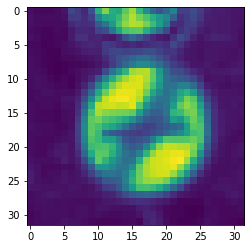

In [101]:
plt.imshow( color.rgb2gray( X_train[0] ) )

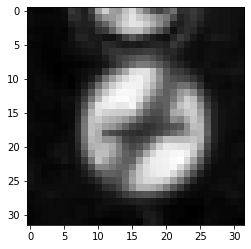

In [102]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )

In [0]:
#Shape return only a size of a matrix, if we need only a matrix then don't use it 

X_train_gray = color.rgb2gray( X_train )
X_test_gray = color.rgb2gray( X_test )

In [104]:
#Previously we had 3 dimensions so now we have to reshape it

input_shape

(32, 32, 3)

In [105]:
X_train_gray.reshape(-1,32,32, 1).shape

(34799, 32, 32, 1)

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1,32,32, 1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1,32,32, 1)

We will use v5 with gray images

In [108]:
model = get_cnn_v5( (32,32,1 ), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 3.0873 - accuracy: 0.1579 - val_loss: 1.1404 - val_accuracy: 0.6325
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.7047 - accuracy: 0.7695 - val_loss: 0.1430 - val_accuracy: 0.9599
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2521 - accuracy: 0.9193 - val_loss: 0.0666 - val_accuracy: 0.9788
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1651 - accuracy: 0.9478 - val_loss: 0.0324 - val_accuracy: 0.9910
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1214 - accuracy: 0.9614 - val_loss: 0.0218 - val_accuracy: 0.9934


0.9655328798185941

# Final score 1 RGB ~96%

3RGB achieved 97%


How does the image look like before and after changes?

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img

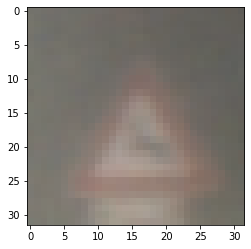

In [113]:
#BEFORE
plt.imshow(X_train[400] )

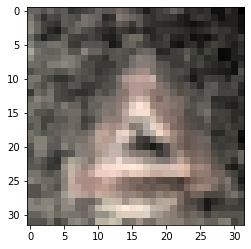

In [114]:
#AFTER
plt.imshow( preproc_img(X_train[400]))